In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME']='yoosuhyeon'
os.environ['KAGGLE_KEY']='캐글키'

In [ ]:
! rm *.* # 폴더안 모든 파일을 삭제하고 다시 파일을 받아옴
! kaggle datasets download -d surajjha101/top-youtube-channels-data
! unzip '*zip'

  0% 0.00/3.21k [00:00<?, ?B/s]
100% 3.21k/3.21k [00:00<00:00, 2.91MB/s]
Archive:  top-youtube-channels-data.zip
  inflating: Top YouTube Channels Data .csv  


In [ ]:
df = pd.read_csv('Top YouTube Channels Data .csv')

In [ ]:
df

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013
...,...,...,...,...,...,...,...
95,96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012
96,97,Like Nastya ESP,32600000,"15,144,858,210",584.0,Entertainment,2017
97,98,Ryan's World,32400000,"51,312,603,726",2155.0,Entertainment,2015
98,99,ABP News,32300000,"9,850,740,503",209351.0,People & Blogs,2012


In [ ]:
df.columns

Index(['rank ', 'youtuber', 'subscribers ', 'video views ', 'video count ',
       'category ', 'started '],
      dtype='object')

In [ ]:
df.columns = ['rank', 'youtuber', 'subscribers', 'video_views', 'video_count', 'category', 'started']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   youtuber     100 non-null    object 
 2   subscribers  100 non-null    int64  
 3   video_views  100 non-null    object 
 4   video_count  95 non-null     float64
 5   category     100 non-null    object 
 6   started      100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [ ]:
df['video_views'].replace(',', '', regex=True,inplace=True)

In [ ]:
df['video_views'] = df['video_views'].astype(int)

In [ ]:
df.head()

,rank,youtuber,subscribers,video_views,video_count,category,started
0,1,T-Series,213000000,188073919029,16708.0,Music,2006
1,2,YouTube Movies,150000000,167122746349,NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,126822520940,751.0,Education,2006
3,4,SET India,131000000,101541977714,78334.0,Shows,2006
4,5,Music,116000000,78437871689,NaN,Music,2013


- 결측값 확인

In [ ]:
df[df['video_count'].isna()]

,rank,youtuber,subscribers,video_views,video_count,category,started
1,2,YouTube Movies,150000000,167122746349,NaN,Film & Animation,2015
4,5,Music,116000000,78437871689,NaN,Music,2013
8,9,Gaming,92100000,71692471446,NaN,Gaming,2013
14,15,Sports,75100000,22156639371,NaN,Sports,2013
76,77,News,36000000,24960523215,NaN,News & Politics,2013


유튜브 자체채널인 것 같으니 삭제해준다

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df['started'].value_counts()

2006    13
2014    12
2012    10
2011    10
2016     7
2007     7
2015     6
2013     6
2008     5
2009     5
2017     5
2005     4
2010     3
2018     1
1970     1
Name: started, dtype: int64

In [ ]:
df[df['started']==1970]

,rank,youtuber,subscribers,video_views,video_count,category,started
93,94,YouTube,32900000,2647950108,483.0,News & Politics,1970


아 ? 유튜브가 1970년대에도 있었나...? 유튜브 공식채널도 삭제해주자

In [ ]:
index1 = df.loc[df['started']==1970].index
df.drop(index1,inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df['rank'] = df['rank'].index + 1

In [ ]:
df

,rank,youtuber,subscribers,video_views,video_count,category,started
0,1,T-Series,213000000,188073919029,16708.0,Music,2006
1,2,Cocomelon - Nursery Rhymes,133000000,126822520940,751.0,Education,2006
2,3,SET India,131000000,101541977714,78334.0,Shows,2006
3,4,PewDiePie,111000000,28260779633,4472.0,Gaming,2010
4,5,MrBeast,93900000,15417304461,721.0,Entertainment,2012
...,...,...,...,...,...,...,...
89,90,Markiplier,32600000,18011837263,5129.0,Gaming,2012
90,91,Like Nastya ESP,32600000,15144858210,584.0,Entertainment,2017
91,92,Ryan's World,32400000,51312603726,2155.0,Entertainment,2015
92,93,ABP News,32300000,9850740503,209351.0,People & Blogs,2012


In [ ]:
df['category'].value_counts()

Music                     33
Entertainment             19
People & Blogs            10
Gaming                     7
Education                  6
Shows                      4
Film & Animation           4
Comedy                     4
Sports                     2
How to & Style             2
News & Politics            1
Trailers                   1
Nonprofits & Activism      1
Name: category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


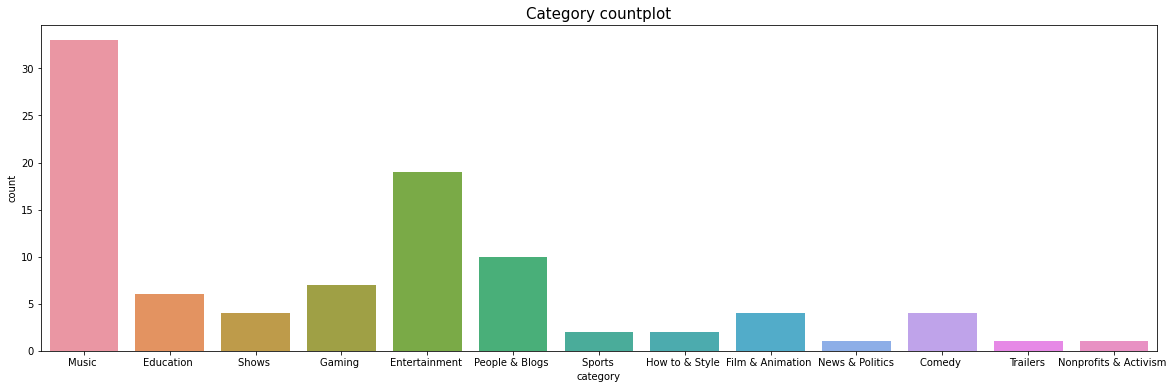

In [ ]:
fig = plt.figure(figsize=(20,6))
s = sns.countplot(df['category'])
s.set_title('Category countplot',fontsize=15)
plt.show()

역시 음악 유튜버가 인기가 많다

- 구독자와 비디오 조회수의 상관관계

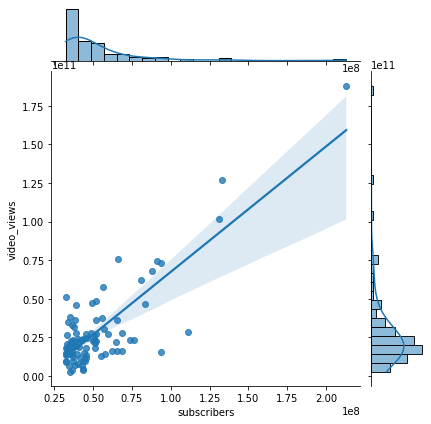

In [ ]:
sns.jointplot(x='subscribers', y='video_views',data=df,kind='reg')

- 유튜브 조회수와 순위의 상관관계

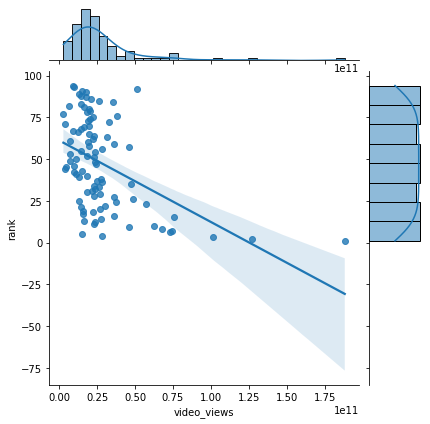

In [ ]:
sns.jointplot(x='video_views', y='rank',data=df,kind='reg')

- 개시연도와 순위의 상관관계

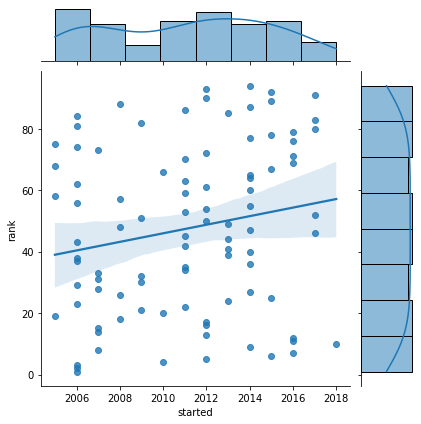

In [ ]:
sns.jointplot(x='started', y='rank',data=df,kind='reg')

In [ ]:
df.shape

(94, 7)

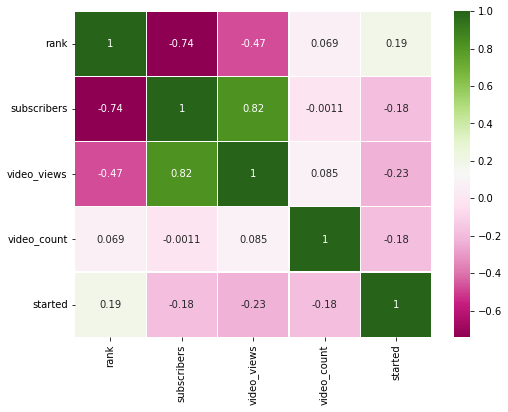

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='PiYG',linewidths=0.2)

# 현재 figure를 확인
fig=plt.gcf()

# 크기 지정
fig.set_size_inches(8,6)
plt.show()

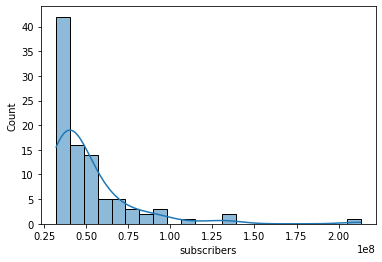

In [ ]:
sns.histplot(x='subscribers',data=df,kde=True)

구독자가 2억명이 넘는다고 ?!

In [ ]:
df[df['subscribers']>2e8]

,rank,youtuber,subscribers,video_views,video_count,category,started
0,1,T-Series,213000000,188073919029,16708.0,Music,2006


조사해보니 T-Series는 인도 발리우드 음반 제작 회사이자 유튜브 인도 음악 레이블 채널이라고 한다.


T-Series 유튜브 채널의 성장은 인도의 신흥 온라인 인구 덕분이다. 인도는 현재 6억 명의 인터넷 사용자를 보유하고 있으며 이 숫자는 빠르게 증가할 것으로 예상된다. 인도의 인터넷 성장의 큰 돌파구는 4G 네트워크 Reliance Jio의 등장으로 2016년 9월에 이루어졌으며, 매우 저렴한 비용으로 데이터를 제공한다. 인도는 그 후 유튜브만 2억 2,500만 명이 넘는 월간 인도 사용자를 보유하는 등, 세계 2위 온라인 인구(유튜브가 차단된 중국 뒤)로 부상했다. 인도의 유튜브 콘텐츠에 대한 높은 수요와 현지에서는 아직까진 유튜브 크리에이터들이 그리 많지가 않아 T-Series의 급속한 성장에 크게 기여했다. 또한 T-Series의 성장은 인도 이외 지역의 시청자가 증가했기 때문이기도 하다. 채널 트래픽의 약 40%는 인도 외부에서, 12%는 미국으로부터 온다. 이 채널의 해외 시청자의 대다수는 전 세계 남아시아 디아스포라 소속이다. 그렇게 하여 PewDiePie와 MrBeast와 같은 외국 유튜버들에 의해 이 채널로 끌어들이게 되었다.<br> 
출처 : 나무위키

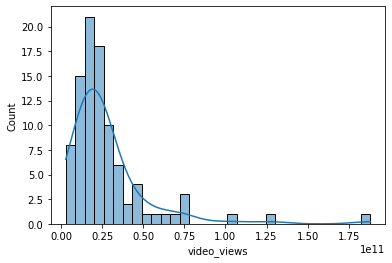

In [ ]:
sns.histplot(x='video_views',data=df,kde=True)

- 연도별 Top 100 내에 있는 카테고리

In [ ]:
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'video_count',
       'category', 'started'],
      dtype='object')

Text(0, 0.5, 'Count')

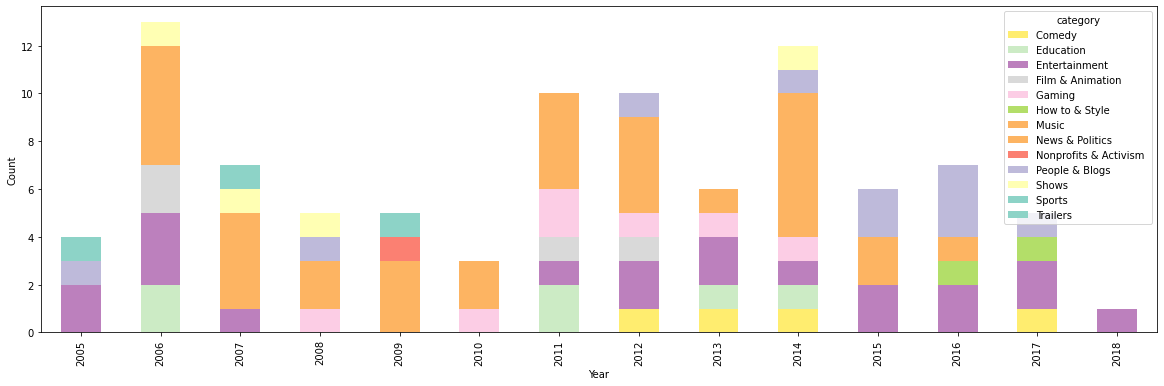

In [ ]:
df.groupby(['started','category'])['category'].count().unstack().plot(kind='bar',stacked=True,figsize=(20,6),colormap='Set3_r')
#plt.title('per year')
plt.xlabel('Year')
plt.ylabel('Count')